In [1]:
import pandas as pd
import numpy as np
import json

# Load the training data
train_path = "/home/data/train.json"
with open(train_path, 'r') as f:
    train_data = json.load(f)

print(f"Number of training samples: {len(train_data)}")
print(f"Sample keys in a training record: {list(train_data[0].keys())}")
print("\nSample record:")
print(json.dumps(train_data[0], indent=2))

Number of training samples: 2878
Sample keys in a training record: ['giver_username_if_known', 'number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'post_was_edited', 'request_id', 'request_number_of_comments_at_retrieval', 'request_text', 'request_text_edit_aware', 'request_title', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_subreddits_at_request

Target Distribution:
requester_received_pizza
False    2163
True      715
Name: count, dtype: int64

Class balance: 715 positive (24.8%) vs 2163 negative (75.2%)


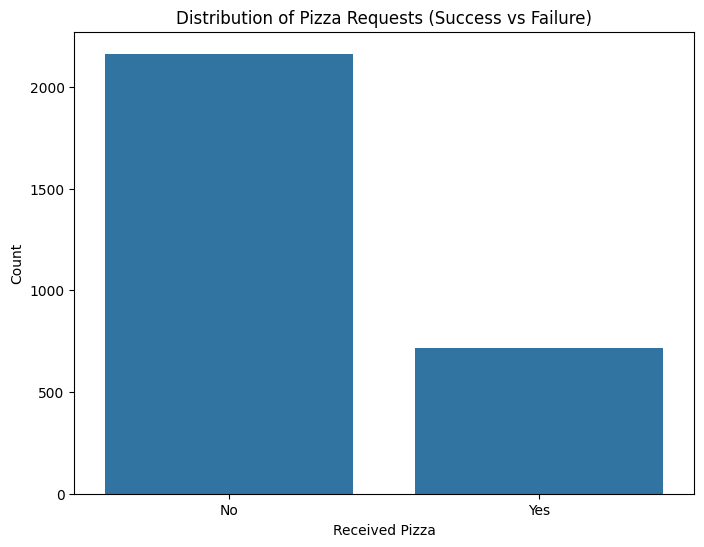

In [2]:
# Analyze target distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easier analysis
df = pd.DataFrame(train_data)

# Target distribution
target_counts = df['requester_received_pizza'].value_counts()
print("Target Distribution:")
print(target_counts)
print(f"\nClass balance: {target_counts[True]} positive ({target_counts[True]/len(df)*100:.1f}%) vs {target_counts[False]} negative ({target_counts[False]/len(df)*100:.1f}%)")

# Plot target distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Pizza Requests (Success vs Failure)')
plt.xlabel('Received Pizza')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [3]:
# Analyze text features
print("=== TEXT FEATURE ANALYSIS ===\n")

# Title analysis
df['title_length'] = df['request_title'].str.len()
df['text_length'] = df['request_text'].str.len()

print("Title length statistics:")
print(df['title_length'].describe())

print("\nText length statistics:")
print(df['text_length'].describe())

# Sample titles and texts by class
print("\n=== SAMPLE SUCCESSFUL REQUESTS ===")
successful = df[df['requester_received_pizza'] == True]
for i in range(3):
    print(f"\nTitle: {successful.iloc[i]['request_title']}")
    print(f"Text (first 200 chars): {successful.iloc[i]['request_text'][:200]}...")

print("\n=== SAMPLE UNSUCCESSFUL REQUESTS ===")
unsuccessful = df[df['requester_received_pizza'] == False]
for i in range(3):
    print(f"\nTitle: {unsuccessful.iloc[i]['request_title']}")
    print(f"Text (first 200 chars): {unsuccessful.iloc[i]['request_text'][:200]}...")

=== TEXT FEATURE ANALYSIS ===

Title length statistics:
count    2878.000000
mean       71.572967
std        36.233487
min         7.000000
25%        46.000000
50%        64.000000
75%        90.000000
max       272.000000
Name: title_length, dtype: float64

Text length statistics:
count    2878.000000
mean      402.521543
std       362.393727
min         0.000000
25%       182.000000
50%       308.000000
75%       503.750000
max      4460.000000
Name: text_length, dtype: float64

=== SAMPLE SUCCESSFUL REQUESTS ===

Title: [REQUEST] Not much food until tomorrow.
Text (first 200 chars): I will go ahead and say that I got a pizza meal from here before as to not seem like I'm scamming anyone. I have been promised 2 well-paying jobs and one minimum wage + .40 to fill in the gaps of unem...

Title: [request]
Text (first 200 chars): Zalodad and myself would love to have a pizza with our kids tonight! My husband lost his job, our food stamps haven't come in yet and I don't get paid till next

In [4]:
# Analyze numerical/meta features
print("=== NUMERICAL/META FEATURE ANALYSIS ===\n")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Key numerical features analysis
key_features = [
    'requester_account_age_in_days_at_request',
    'requester_number_of_comments_at_request', 
    'requester_number_of_posts_at_request',
    'requester_upvotes_minus_downvotes_at_request',
    'requester_number_of_subreddits_at_request',
    'number_of_upvotes_of_request_at_retrieval',
    'number_of_downvotes_of_request_at_retrieval',
    'request_number_of_comments_at_retrieval'
]

for feature in key_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(df[feature].describe())
        
        # Correlation with target
        corr = df[feature].corr(df['requester_received_pizza'].astype(int))
        print(f"Correlation with target: {corr:.3f}")

# Analyze user flair
print("\n=== USER FLAIR ANALYSIS ===")
flair_counts = df['requester_user_flair'].value_counts()
print(flair_counts)

# Success rate by flair
print("\nSuccess rate by flair:")
flair_success = df.groupby('requester_user_flair')['requester_received_pizza'].agg(['count', 'sum', 'mean'])
flair_success.columns = ['total_requests', 'successful_requests', 'success_rate']
print(flair_success)

=== NUMERICAL/META FEATURE ANALYSIS ===

Numerical columns: ['number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'request_number_of_comments_at_retrieval', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request', 'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_minus_downvotes_at_retrieval', 'requester_upvotes_plus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_retri